來源： https://github.com/purelyvivid/realcasehousebitprediction

In [1]:
import pandas as pd
import numpy as np 

# 載入資料

In [2]:
input_fname = "realcasehousebitprediction/house1.csv"

In [3]:
df = pd.read_csv(input_fname, encoding="big5")
df

,次,樓層,棟,號,出售面積(坪),持分土地面積(坪),標售單價(元/m2),標售總價(元),投標數,得標總價(元)/標售總價(元)
0,2019,3,C,_1,29.79,5.31,"69,118","6,806,071",2,1.0171
1,2019,5,C,_1,29.79,5.31,"69,118","6,806,071",3,1.0088
2,2019,6,C,_1,29.79,5.31,"69,118","6,806,071",4,1.0298
3,2019,7,C,_1,29.79,5.31,"69,723","6,865,651",6,1.1055
4,2019,4,D,_1,29.79,5.31,"68,543","6,749,470",5,1.0214
5,2019,5,D,_1,29.79,5.31,"69,118","6,806,071",3,1.0690
6,2019,7,D,_1,29.79,5.31,"69,723","6,865,651",7,1.0857
7,2019,3,C,_2,32.10,5.77,"67,229","7,134,310",3,1.2167
8,2019,4,C,_2,32.10,5.77,"66,624","7,070,110",2,1.0268
9,2019,5,C,_2,32.10,5.77,"67,229","7,134,310",3,1.1396


# 資料清理

"7,442,470" --> "7442470"

In [4]:
to_int = lambda x: int(x.replace(",",""))

In [5]:
df["標售單價(元/m2)"] = df["標售單價(元/m2)"].apply(to_int)
df["標售總價(元)"] = df["標售總價(元)"].apply(to_int)

In [6]:
df_op = df.copy()

In [7]:
df.head()

,次,樓層,棟,號,出售面積(坪),持分土地面積(坪),標售單價(元/m2),標售總價(元),投標數,得標總價(元)/標售總價(元)
0,2019,3,C,_1,29.79,5.31,69118,6806071,2,1.0171
1,2019,5,C,_1,29.79,5.31,69118,6806071,3,1.0088
2,2019,6,C,_1,29.79,5.31,69118,6806071,4,1.0298
3,2019,7,C,_1,29.79,5.31,69723,6865651,6,1.1055
4,2019,4,D,_1,29.79,5.31,68543,6749470,5,1.0214


取得 y

- y_inter: 投標數
- y: 得標價/起標價 （溢價率）

In [8]:
no_2019 = np.array(df["次"]==2019)
no_2020 = np.array(df["次"]==2020)

In [9]:
y_inter = np.array(df.loc[no_2019,"投標數"].astype(np.float32))

In [10]:
y = np.array(df.loc[no_2019,"得標總價(元)/標售總價(元)"].astype(np.float32))

收集欄位名稱和資料的變數

In [11]:
feature_names_list = []
X_list = []

## 離散變數 ["棟", "號"]

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
cnames = ["棟", "號"]

In [14]:
ohe = OneHotEncoder(sparse=False)
X = ohe.fit_transform(df[cnames])

In [15]:
ohe.get_feature_names()

array(['x0_A', 'x0_B', 'x0_C', 'x0_D', 'x1__1', 'x1__2', 'x1__3', 'x1__5'],
      dtype=object)

In [16]:
feature_names = []
for i, cn in enumerate(ohe.get_feature_names()):
    sp = cn.split("_")
    k = cnames[int(sp[0].replace("x",""))]+"_"+("".join(sp[1:]))
    feature_names.append(k)
feature_names

['棟_A', '棟_B', '棟_C', '棟_D', '號_1', '號_2', '號_3', '號_5']

In [17]:
feature_names_list += feature_names
X_list.append(X) 

## 連續變數

In [18]:
cnames = [ '樓層', '出售面積(坪)', '持分土地面積(坪)', '標售單價(元/m2)', ]

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
ss = StandardScaler()

In [21]:
X = ss.fit_transform(df[cnames])

In [22]:
feature_names_list += cnames
X_list.append(X) 

## 離散變數與連續變數 總和

In [23]:
X = np.concatenate(X_list, 1)

In [24]:
feature_names = feature_names_list

In [25]:
X.shape, len(feature_names)

((42, 12), 12)

# 第一步：預測投標數

In [26]:
X_train, y_train = X[no_2019], y_inter
X_test = X[no_2020]

In [27]:
from sklearn.ensemble import RandomForestRegressor
submodel = RandomForestRegressor()
submodel.fit(X_train,y_train)
print(submodel.score(X_train,y_train))

0.8302569322255884


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [28]:
y_test_pred = submodel.predict(X_test)

In [29]:
n_bit_pred = np.round(y_test_pred)
n_bit_pred

array([ 7.,  9.,  7.,  8.,  5.,  7.,  5.,  7.,  5.,  7.,  2.,  9., 13.,
        9., 10.,  7.,  9.,  7.,  9.,  7.,  9.,  7.,  9.,  7.,  8.])

In [30]:
np.mean(n_bit_pred)

7.56

In [31]:
n_bit = np.concatenate((y_inter,n_bit_pred)).reshape((-1,1))

In [32]:
ss = StandardScaler()

In [33]:
n_bit_norm = ss.fit_transform(n_bit)
n_bit_norm.shape

(42, 1)

In [34]:
X = np.concatenate((X,n_bit_norm), 1)
X.shape

(42, 13)

# 第二步：預測得標價

## 訓練

In [35]:
X_train, y_train = X[no_2019], y
X_test = X[no_2020]

In [36]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

In [37]:
def trian(model, print_name=""):
    model = model()
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    err_mean = np.mean((y_train_pred - y_train)**2)
    err_std = np.std((y_train_pred - y_train)**2)
    print("[{}] R-sq:{:4f}, 誤差:0% ~ {:.2f}%".format( print_name, model.score(X_train,y_train) , (err_mean+err_std*3)*100 ))
    return model

def get_y_test_pred(model, X_test, print_name="", train=False):
    if train:
        model = trian(model, print_name=print_name)
    y_test_pred = model.predict(X_test)
    return y_test_pred, model

嘗試各個模型

In [38]:
models = [SVR, RandomForestRegressor, ExtraTreesRegressor]
print_names = ["SVR", "RandomForestRegressor", "ExtraTreesRegressor"]
y_test_pred_list = []
trained_models = []
for model,name in zip(models,print_names):
    y_test_pred, trained_model = get_y_test_pred(model, X_test, print_name=name, train=True)
    y_test_pred_list.append(y_test_pred)
    trained_models.append(trained_model)


[SVR] R-sq:0.387439, 誤差:0% ~ 1.72%
[RandomForestRegressor] R-sq:0.921059, 誤差:0% ~ 0.47%
[ExtraTreesRegressor] R-sq:1.000000, 誤差:0% ~ 0.00%


/opt/conda/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


嘗試印出溢價率

In [39]:
y_test_pred_list[0]

array([1.12776632, 1.1481111 , 1.13136142, 1.14398394, 1.13157441,
       1.1463522 , 1.13157441, 1.1463522 , 1.13589083, 1.14839094,
       1.14723756, 1.1426201 , 1.17022188, 1.144266  , 1.15779079,
       1.14198673, 1.15892225, 1.14198673, 1.15892225, 1.14458194,
       1.15960841, 1.14458194, 1.15960841, 1.20604966, 1.20835537])

## 投標人數是預測的，若想知道每一個投標人數下的結果

In [40]:
X_test.shape

(25, 13)

In [41]:
X_test_ = X_test[:, :-1] # 移除原本預測的得標數
X_test_.shape

(25, 12)

In [42]:
n_bit_assumed = np.array(list(range(1,21))).reshape((-1,1)) # 投標人數假定為 1~20
n_bit_assumed_norm = ss.transform(n_bit_assumed)
len(n_bit_assumed)

20

In [43]:
X_list = []
is_default_n_bit = []
nbs = []
for nbn, nb in zip(n_bit_assumed_norm, n_bit_assumed.flatten()):# 每一個 投標人數 設定
    for x, nb_ in zip(X_test_, n_bit_pred): # 每一筆資料
        X_list.append( np.concatenate( [x,nbn]).reshape((1,-1)) )
        is_default_n_bit += [ nb == nb_ ]
        nbs.append(nb)
X_test_rep = np.concatenate(X_list, 0)
X_test_rep.shape

(500, 13)

In [44]:
is_default_n_bit = np.array(is_default_n_bit)
is_default_n_bit.sum()

25

In [45]:
models = [SVR, RandomForestRegressor, ExtraTreesRegressor]
print_names = ["SVR", "RandomForestRegressor", "ExtraTreesRegressor"]
y_test_pred_list = []
for trained_model,name in zip(trained_models,print_names):
    y_test_pred, _ = get_y_test_pred(trained_model, X_test_rep, print_name=name)
    y_test_pred_list.append( y_test_pred )


嘗試印出溢價率

In [46]:
y_test_pred_list[0].shape

(500,)

# 匯出

In [47]:
del df_op["投標數"]
del df_op["得標總價(元)/標售總價(元)"]
df_op = df_op.iloc[no_2020,:]

In [48]:
print(df_op.shape)
df_op = pd.concat([df_op]*len(n_bit_assumed_norm), ignore_index=True)
print(df_op.shape)

(25, 8)
(500, 8)


In [49]:
for i,model_name in enumerate(print_names):
    if i == 0 : df_op["投標數(假設為)"] = nbs
    df_op[model_name+"_""得標總價/標售總價(預測)"] = y_test_pred_list[i]
    df_op[model_name+"_""得標總價(預測)"] = df_op["標售總價(元)"]*y_test_pred_list[i]

In [50]:
df_op.head()

,次,樓層,棟,號,出售面積(坪),持分土地面積(坪),標售單價(元/m2),標售總價(元),投標數(假設為),SVR_得標總價/標售總價(預測),SVR_得標總價(預測),RandomForestRegressor_得標總價/標售總價(預測),RandomForestRegressor_得標總價(預測),ExtraTreesRegressor_得標總價/標售總價(預測),ExtraTreesRegressor_得標總價(預測)
0,2020,8,C,_1,29.79,5.31,69723,6865651,1,1.110136,7.621804e+06,1.05124,7.217447e+06,1.07102,7.353250e+06
1,2020,8,C,_2,32.10,5.77,67803,7195300,1,1.115738,8.028072e+06,1.14668,8.250707e+06,1.09850,7.904037e+06
2,2020,9,C,_1,29.79,5.31,70873,6978853,1,1.116375,7.791019e+06,1.05124,7.336449e+06,1.07102,7.474491e+06
3,2020,9,C,_2,32.10,5.77,68983,7320490,1,1.119242,8.193398e+06,1.13915,8.339136e+06,1.09387,8.007665e+06
4,2020,1,C,_1,29.79,5.31,72053,7095034,1,1.123937,7.974372e+06,1.05607,7.492852e+06,1.03478,7.341799e+06


In [51]:
df_op.to_csv("realcasehousebitprediction/house_pred_2_.csv", encoding="big5")

# 分析 - 影響因子

In [52]:
from sklearn.svm import SVR
lr_ = SVR(kernel="linear")
lr_.fit(X_train,y_train)
coef = lr_.coef_[0]

In [53]:
coef

array([ 0.01830565, -0.01449738,  0.00190154, -0.00570981,  0.00496255,
        0.00953483, -0.01449738,  0.        , -0.01248494,  0.01093151,
        0.0112517 ,  0.01550698,  0.03106062])

In [54]:
feature_names += ["投標數(假設為)"]

In [55]:
feature_names = np.array(feature_names)

In [56]:
coef_sort = np.sort(coef)

In [57]:
rank = list(feature_names[ np.argsort(coef)])
rank

['棟_B',
 '號_3',
 '樓層',
 '棟_D',
 '號_5',
 '棟_C',
 '號_1',
 '號_2',
 '出售面積(坪)',
 '持分土地面積(坪)',
 '標售單價(元/m2)',
 '棟_A',
 '投標數(假設為)']

In [58]:
dict(zip(range(len(rank),0,-1), [(r,round(c,4)) for r,c in zip(rank, coef_sort)]  ))

{13: ('棟_B', -0.0145),
 12: ('號_3', -0.0145),
 11: ('樓層', -0.0125),
 10: ('棟_D', -0.0057),
 9: ('號_5', 0.0),
 8: ('棟_C', 0.0019),
 7: ('號_1', 0.005),
 6: ('號_2', 0.0095),
 5: ('出售面積(坪)', 0.0109),
 4: ('持分土地面積(坪)', 0.0113),
 3: ('標售單價(元/m2)', 0.0155),
 2: ('棟_A', 0.0183),
 1: ('投標數(假設為)', 0.0311)}

# 投標數的影響

In [59]:
df_8C1 = df_op[(df_op["樓層"]==8)&(df_op["棟"]=="C")&(df_op["號"]=="_1")]

In [60]:
df_8C1.head()

,次,樓層,棟,號,出售面積(坪),持分土地面積(坪),標售單價(元/m2),標售總價(元),投標數(假設為),SVR_得標總價/標售總價(預測),SVR_得標總價(預測),RandomForestRegressor_得標總價/標售總價(預測),RandomForestRegressor_得標總價(預測),ExtraTreesRegressor_得標總價/標售總價(預測),ExtraTreesRegressor_得標總價(預測)
0,2020,8,C,_1,29.79,5.31,69723,6865651,1,1.110136,7.621804e+06,1.05124,7.217447e+06,1.07102,7.353250e+06
25,2020,8,C,_1,29.79,5.31,69723,6865651,2,1.110811,7.626438e+06,1.05124,7.217447e+06,1.07102,7.353250e+06
50,2020,8,C,_1,29.79,5.31,69723,6865651,3,1.112493,7.637986e+06,1.05041,7.211749e+06,1.07102,7.353250e+06
75,2020,8,C,_1,29.79,5.31,69723,6865651,4,1.115143,7.656183e+06,1.06008,7.278140e+06,1.08279,7.434058e+06
100,2020,8,C,_1,29.79,5.31,69723,6865651,5,1.118671,7.680403e+06,1.08492,7.448682e+06,1.09793,7.538004e+06


In [61]:
df_8C1["得標總價(預測)"] = np.mean( [ df_8C1["SVR_得標總價(預測)"], 
                                    df_8C1["ExtraTreesRegressor_得標總價(預測)"] , 
                                    df_8C1["RandomForestRegressor_得標總價(預測)"] ] , 0) 
df_8C1[ ["投標數(假設為)", "得標總價(預測)"] ]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,投標數(假設為),得標總價(預測)
0,1,7.397500e+06
25,2,7.399045e+06
50,3,7.400995e+06
75,4,7.456127e+06
100,5,7.555696e+06
125,6,7.612902e+06
150,7,7.624320e+06
175,8,7.732640e+06
200,9,7.744866e+06
225,10,7.756961e+06


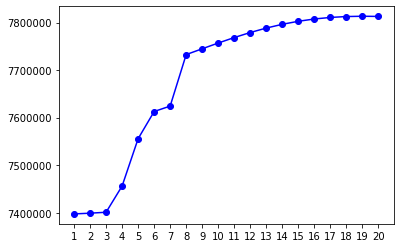

In [62]:
import matplotlib.pyplot as plt
plt.xticks(range(1,21))
plt.plot(df_8C1["投標數(假設為)"], df_8C1["得標總價(預測)"] , "bo-")
